In [90]:
import pandas as pd
import matplotlib.pylab as plt
import string                            #导入字符串模块

# 数据预处理

In [91]:
tab1 = "./hair_dryer.tsv"
print(tab1)

./hair_dryer.tsv


In [92]:
tab2 = "."

In [93]:
df_hd = pd.read_csv(tab1, sep='\t', header=0)

In [94]:
df_hd.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015


## 删除无效信息

### 既没有购买也没有受邀

In [95]:
df_hd = df_hd[~(df_hd['vine'].str.contains("N") & df_hd['verified_purchase'].str.contains("N"))]

### 删除评论数过少的

In [96]:
df_hd = df_hd[(df_hd['total_votes'] > 0) & (df_hd['helpful_votes'] > 0)]

### 评论条数过少
按照 product_parent 进行分类

In [97]:
df_hd = df_hd.groupby('product_parent').filter(lambda x: len(x) > 1)

In [98]:
df_hd.describe(include="all")

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
count,2775,2.775000e+03,2775,2775,2.775000e+03,2775,2775,2775.000000,2775.000000,2775.000000,2775,2775,2775,2775,2775
unique,1,NaN,2775,173,NaN,143,1,NaN,NaN,NaN,2,2,2359,2770,1487
top,US,NaN,R3PVZLLMNT4PCS,B00132ZG3U,NaN,conair 1875 watt tourmaline ceramic hair dryer,Beauty,NaN,NaN,NaN,N,Y,Five Stars,None available.,1/3/2015
freq,2775,NaN,1,152,NaN,152,2775,NaN,NaN,NaN,2691,2692,93,4,8
mean,NaN,2.978578e+07,NaN,NaN,4.940635e+08,NaN,NaN,3.840721,5.580180,6.407928,NaN,NaN,NaN,NaN,NaN
std,NaN,1.496295e+07,NaN,NaN,2.866049e+08,NaN,NaN,1.459326,22.852115,24.715966,NaN,NaN,NaN,NaN,NaN
min,NaN,3.219200e+04,NaN,NaN,4.239600e+05,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.604536e+07,NaN,NaN,2.351060e+08,NaN,NaN,3.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.949251e+07,NaN,NaN,4.867740e+08,NaN,NaN,5.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.386433e+07,NaN,NaN,7.346325e+08,NaN,NaN,5.000000,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN


In [99]:
df_hd.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtype: object

In [100]:
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2775 entries, 7 to 11469
Data columns (total 15 columns):
marketplace          2775 non-null object
customer_id          2775 non-null int64
review_id            2775 non-null object
product_id           2775 non-null object
product_parent       2775 non-null int64
product_title        2775 non-null object
product_category     2775 non-null object
star_rating          2775 non-null int64
helpful_votes        2775 non-null int64
total_votes          2775 non-null int64
vine                 2775 non-null object
verified_purchase    2775 non-null object
review_headline      2775 non-null object
review_body          2775 non-null object
review_date          2775 non-null object
dtypes: int64(5), object(10)
memory usage: 346.9+ KB


## 按照 id 进行分组

### product_id

In [101]:
gp_pid = df_hd.groupby('product_id')

# 选特定的一组
print(gp_pid.get_group('B003V264WW')['star_rating'])

# 遍历
for item in gp_pid:
    print(item[0])
    print(item[1]['star_rating'])

282      1
363      2
448      3
504      3
730      5
        ..
10083    5
10129    5
10135    3
10139    5
10142    5
Name: star_rating, Length: 90, dtype: int64
B00005O0MZ
186      2
378      5
613      4
627      5
860      5
        ..
11397    5
11406    5
11446    2
11467    5
11469    3
Name: star_rating, Length: 74, dtype: int64
B000065DJY
55      2
327     5
458     1
618     1
2019    4
3427    4
3991    5
5746    5
6060    5
7231    5
Name: star_rating, dtype: int64
B00006IV22
154      1
179      1
274      1
608      3
891      2
931      5
999      5
1043     5
1236     4
1291     5
1299     5
1340     4
1420     5
1545     3
1667     5
2491     4
2571     5
2631     5
3306     5
3425     1
3554     5
4114     1
4917     5
5015     2
5280     4
5562     3
5707     5
5764     5
5873     5
6045     4
6139     5
6183     5
6328     5
6485     5
7162     4
7176     5
7878     4
8056     3
8318     1
8395     4
8905     5
9154     1
9481     5
9687     4
9795     5
10125    1

### product_parent

In [122]:
gp_pp = df_hd.groupby('product_parent')

# # 选特定的一组
# print(gp_pp.get_group(732252283)['star_rating'])

# # 遍历
# for item in gp_pp:
#     print(item[0])
#     print(item[1]['star_rating'])

# gp_pp[['star_rating', 'helpful_votes', 'total_votes']].sum()

gp_pp[['star_rating', 'helpful_votes', 'total_votes']].sum().sort_values(by='helpful_votes',ascending=False)


,star_rating,helpful_votes,total_votes
product_parent,,,
758099411,597,1662,1943
47684938,454,877,923
732252283,332,625,677
127343313,194,534,579
694290590,284,483,508
...,...,...,...
168649310,22,10,11
791081896,12,8,12
54987170,21,6,6


In [132]:
df_pp = gp_pp.get_group(758099411)
df_pp

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
296,US,11821084,R1WN126DEQYYLR,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,1,1,N,Y,My wife loves it (I did good on this one),It will seriously dim the lights in your house...,8/7/2015
787,US,11629881,RUIS0SWYLIXFP,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,3,1,1,N,Y,"Cheap, but marginal at best...",I had high hopes for this dryer based on the r...,6/25/2015
843,US,37352394,R1C0FK0969SU1V,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,3,4,N,Y,Improved My Hair Style,If I had only known what a difference a hair d...,6/19/2015
995,US,28597406,R45E5WY8GZPIH,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,1,10,12,N,Y,What a disappointment!,I have always bought Conair products in the pa...,6/8/2015
1013,US,51840199,R16P9RYCVZSP7,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,2,2,N,Y,Don't ask Dogs their opinions,Been using this twice daily for over a year. S...,6/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10733,US,32890035,R28D0A0WWNCGUF,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,4,4,N,Y,Would buy again and did!,"This is light weight, inexpensive, and was a g...",8/24/2009
10736,US,29350116,R13MVLELEXVD4X,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,3,3,11,N,Y,Dryer,"My hair is curly, so I think this dryer is not...",8/21/2009
10772,US,52158465,R1MAA5BQFDBP46,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,45,57,N,Y,great hairdryer for a good price,I bought this hair dryer to replace an old Con...,6/23/2009
10876,US,12590234,R1F2PGWA1SN4PU,B00132ZG3U,758099411,conair 1875 watt tourmaline ceramic hair dryer,Beauty,5,304,321,N,Y,Conair 225 hairdryer,My old Conair died so I read all the reviews a...,3/7/2009


### product_title

In [48]:
gp_pt = df_hd.groupby('product_title')

# 选特定的一组
print(gp_pt.get_group('andis micro turbo hair dryer')['star_rating'])

# 遍历
for item in gp_pt:
    print(item[0])
    print(item[1]['star_rating'])

1        4
33       5
40       5
113      5
158      4
        ..
11215    4
11239    5
11248    2
11254    5
11258    5
Name: star_rating, Length: 211, dtype: int64
'Tween Time Instant Hair Color Touch Up Stick
10113    5
Name: star_rating, dtype: int64
(3 Pack) Ivory Caps **SUPER VALUE**- Maximum Potency Glutathione 1500 Skin Whitening Complex
10359    5
Name: star_rating, dtype: int64
100% Pure Organic Kids Vanilla Ice Cream Body Cream
9713    2
Name: star_rating, dtype: int64
130 BEST Blade Sampler FEATHER SHARK ASTRA NACET BIC LORD 7 O'Clock
10487    5
Name: star_rating, dtype: int64
2011 Australian Gold HellBent 10x Bronzer Tanning Lotion 11 oz.
9368    1
Name: star_rating, dtype: int64
30 Derby Extra Double Edge Razor Blades with Chromium-Ceramic-Platinum-Tungsten and Polymer Coated Edges (30 blades)
10323    5
Name: star_rating, dtype: int64
3M Medical & Surgical (n) Micropore Surgical Tape White 1 X 10 Yards Bx/12
10119    5
Name: star_rating, dtype: int64
5 Pairs Set of 10 To

7       3
18      5
25      5
31      4
36      5
       ..
8135    5
8326    4
8405    5
8689    5
9633    4
Name: star_rating, Length: 134, dtype: int64
conair sb1xr soft bonnet hair dryer 4 heat settings hot/warm/low/cool
2173    5
2824    5
2931    5
3098    4
Name: star_rating, dtype: int64
conair soft bonnet hair dryer 1 ea
27       2
155      3
236      4
340      3
427      3
        ..
11320    4
11345    5
11352    5
11362    4
11442    1
Name: star_rating, Length: 155, dtype: int64
conair the power of pink ionic hair dryer
875      5
2415     5
3566     1
4704     5
5480     2
6201     1
6207     5
7047     5
7464     5
8211     5
8453     2
9007     2
9215     5
9337     3
9494     1
9575     5
9912     5
9978     3
10070    5
10633    5
10894    5
10919    4
10967    5
Name: star_rating, dtype: int64
conair thermal shine 1875 watt hair dryer 1 ea
470      4
896      5
1213     5
1502     5
1522     5
1566     4
1610     5
1683     4
1771     4
2043     5
2080     5
2507   

# 文本分析

## 整体文本分析

### 读取文件，并分词

In [134]:
reviews = ''
for review in df_pp['review_body']:
    reviews = reviews + ' ' + review
hist = {}                                 #创建一个空字典，放词频与单词，无序排列
data = []                                 #创建一个空列表，放词频与单词，有序：从多到少
content = reviews.replace('-',' ')       #连字符—用空格代替
words = content.split()                   #字符串按空格分割--分词

### 保存全部评论 2 txt

In [135]:
# fw = open("./reviews.txt", 'w')    #将要输出保存的文件地址
# fw.write(reviews)

### 迭代处理：将字典变列表，存入数据

In [170]:
for i in range(len(words)):
    words[i] = words[i].strip(string.punctuation)  #去掉标点符号，去掉首尾
    words[i] = words[i].lower()                    #统一大小写
    if words[i] in hist:                          #统计词频与单词
        hist[words[i]] = hist[words[i]] + 1        #不是第一次
    else:
        hist[words[i]] = 1                         #第一次
# print(hist)

### 删除介词

In [171]:
excludes={"not","if","setting","about","really","too","br","has","very", "so","on","at","when", "was","one","had", "it's","than","would","the","and","of","you","a","with","but","as","be","in","or","are", "i", "it", "to", "hair","this", "is", "my", "dryer", "for", "that", "have"}
for word in excludes:
    if word in hist:
        del(hist[word])

### 遍历添加

In [172]:
for key, value in hist.items():                    #遍历字典
    temp = [value,key]                              #变量，变量值
    data.append(temp)                               #添加数据
data.sort(reverse=True)                            #排序

# for i in range(0,300):
#     print(data[i]) 

### 绘制直方图

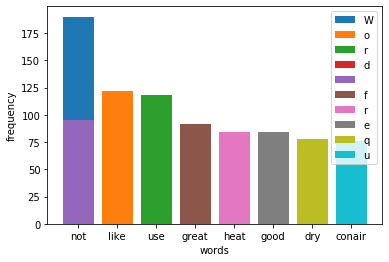

In [173]:
for i in range(0,10):
    plt.bar((data[i][1],),(data[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                                   # 显示y轴名称
plt.legend('Word frequency histogram')                             #显示图例
plt.show()                                            #显示作图结果


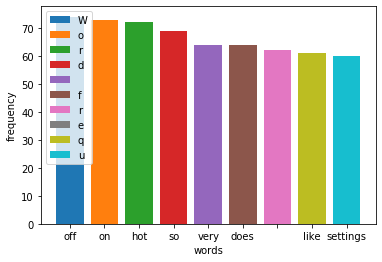

In [174]:
for i in range(10,20):
    plt.bar((data[i][1],),(data[i][0],))
plt.xlabel('words')                                   # 显示x轴名称
plt.ylabel('frequency')                                   # 显示y轴名称
plt.legend('Word frequency histogram')                             #显示图例
plt.show()    